In [1]:
import matplotlib.pyplot as plt
import numpy as np

import random
import librosa

import warnings
warnings.filterwarnings("ignore")

from composition.common import (
    sinusoid, sweeping_sinusoid, line_segment, constant, triangle, square, adsr,
    autotune, SECOND, get_t, autotune_explicit, phasor,
    sweeping_square, sweeping_triangle, bpc, rescale, to_db_loudness, harmonics_to_pitches
)
from composition.instrument import Score, Part, Phrase
from utils import QuantileTransformer

plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

In [3]:
import ddsp
from composition.instrument import show

* violin: mean: -43.36, std: 5.23
* viola: mean: -42.76, std: 7.77
* cello: mean: -57.26, std: 6.12
* flute: mean: -55.27, std: 8.37
* flute2: mean: -55.27, std: 8.37

- Violin 55-103
- Viola 48-91
- Cello 36-76
- Flute 60-96
- Flute2 55-91

In [4]:
higher_harms = harmonics_to_pitches(36, [2, 11, 13, 15, 17, 19, 21, 23, 25, 27])[1:]

In [5]:
stretched_higher_harms = harmonics_to_pitches(36, [n ** 1.02 for n in [2, 11, 13, 15, 17, 19, 21, 23, 25, 27]])[1:]

In [6]:
duration = 25
pitches = sweeping_sinusoid(duration, 0.1, 0.01, 72, 3)
pitches += line_segment(duration, 0, 7)
pitches = autotune(pitches, 0.9)
pitches += sinusoid(duration, 4, 0, 0.15)

amps = np.concatenate([adsr(0.1, 0.1, 1 - (0.1 + 0.1 + 0.5), 0.5, 1, 0.8) for _ in range(25)])
padding = len(pitches) - len(amps)
amps = np.pad(amps, (0, padding), mode='edge')

# amps = sweeping_triangle(duration, 2, 6, 0.1)

amps = rescale(amps, -70, -55)
amps += line_segment(duration, 0, 8)
amps += sinusoid(duration, 4, 0, 1, phase=0.1324)

In [7]:
vln1_phrase = Phrase(pitches, amps)
vln1_part = Part('Vln. 1', 'violin')
vln1_part.add_phrase(vln1_phrase)

In [8]:
s, _ = librosa.load('/home/kureta/Documents/Stasis/path of least resistance/Path of Least Resistance - Voice/samples/Audio 1-26.wav', 16000)

In [9]:
audio_features = ddsp.training.metrics.compute_audio_features(s)

In [10]:
p = Phrase(librosa.hz_to_midi(audio_features['f0_hz']), audio_features['loudness_db'])

In [11]:
vln1_part.add_phrase(p)

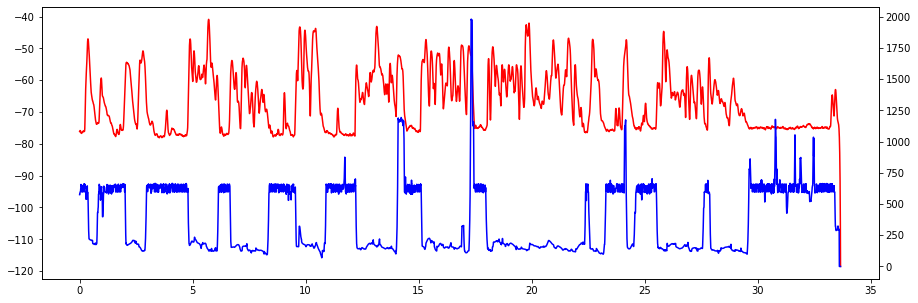

In [12]:
show(audio_features['f0_hz'], audio_features['loudness_db'])

In [13]:
vln1_part.phrases[1].pitch += 24.0

In [14]:
vln1_part.play()

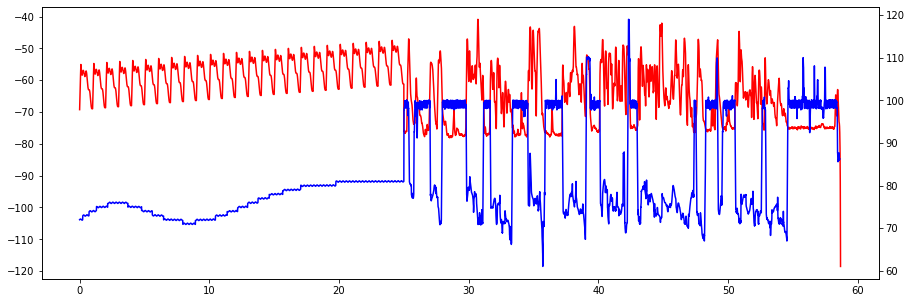

In [15]:
vln1_part.show()

In [16]:
duration = 25
pitches = sweeping_sinusoid(duration, 0.1, 2, 60, 3)

amps = sweeping_triangle(duration, 1, 8, 0.5, -80, -12)

flute_ph = Phrase(pitches, amps)
flute_part = Part('Flt. 1', 'flute')
flute_part.add_phrase(flute_ph)

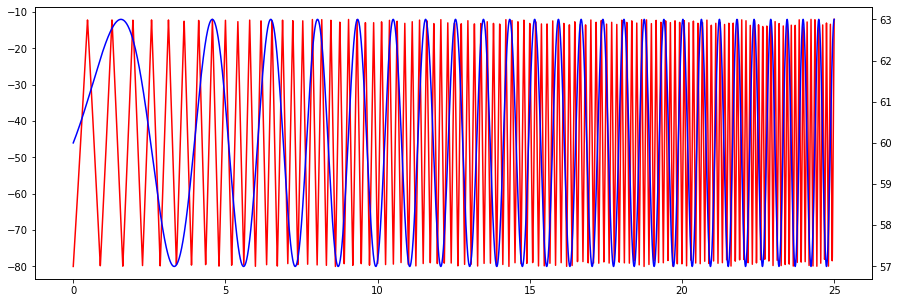

In [17]:
flute_part.show()

In [18]:
flute_part.play()

In [19]:
duration = 25
pitches = sweeping_sinusoid(duration, 0.1, 2, 72, 3)
pitches += line_segment(duration, 0, 7)
pitches = autotune(pitches, 0.9)
pitches += sinusoid(duration, 4, 0, 0.15)

amps = np.concatenate([adsr(0.1, 0.1, 1 - (0.1 + 0.1 + 0.5), 0.5, 1, 0.8) for _ in range(25)])
padding = len(pitches) - len(amps)
amps = np.pad(amps, (0, padding), mode='edge')

# amps = sweeping_triangle(duration, 2, 6, 0.1)

amps = rescale(amps, -70, -55)
amps += line_segment(duration, 0, 8)
amps += sinusoid(duration, 4, 0, 1, phase=0.1324)

In [20]:
import pickle

In [21]:
with open('audio-data/original/22 Seconds V/score.pkl', 'rb') as f:
    score = pickle.load(f)

In [22]:
for part in score.parts:
    for phrase in part.phrases:
        mean = np.mean(phrase.loudness)
        std = np.std(phrase.loudness)
        limit = mean - std
        phrase.loudness = to_db_loudness(phrase.loudness, part.instrument, min_loudness=limit)

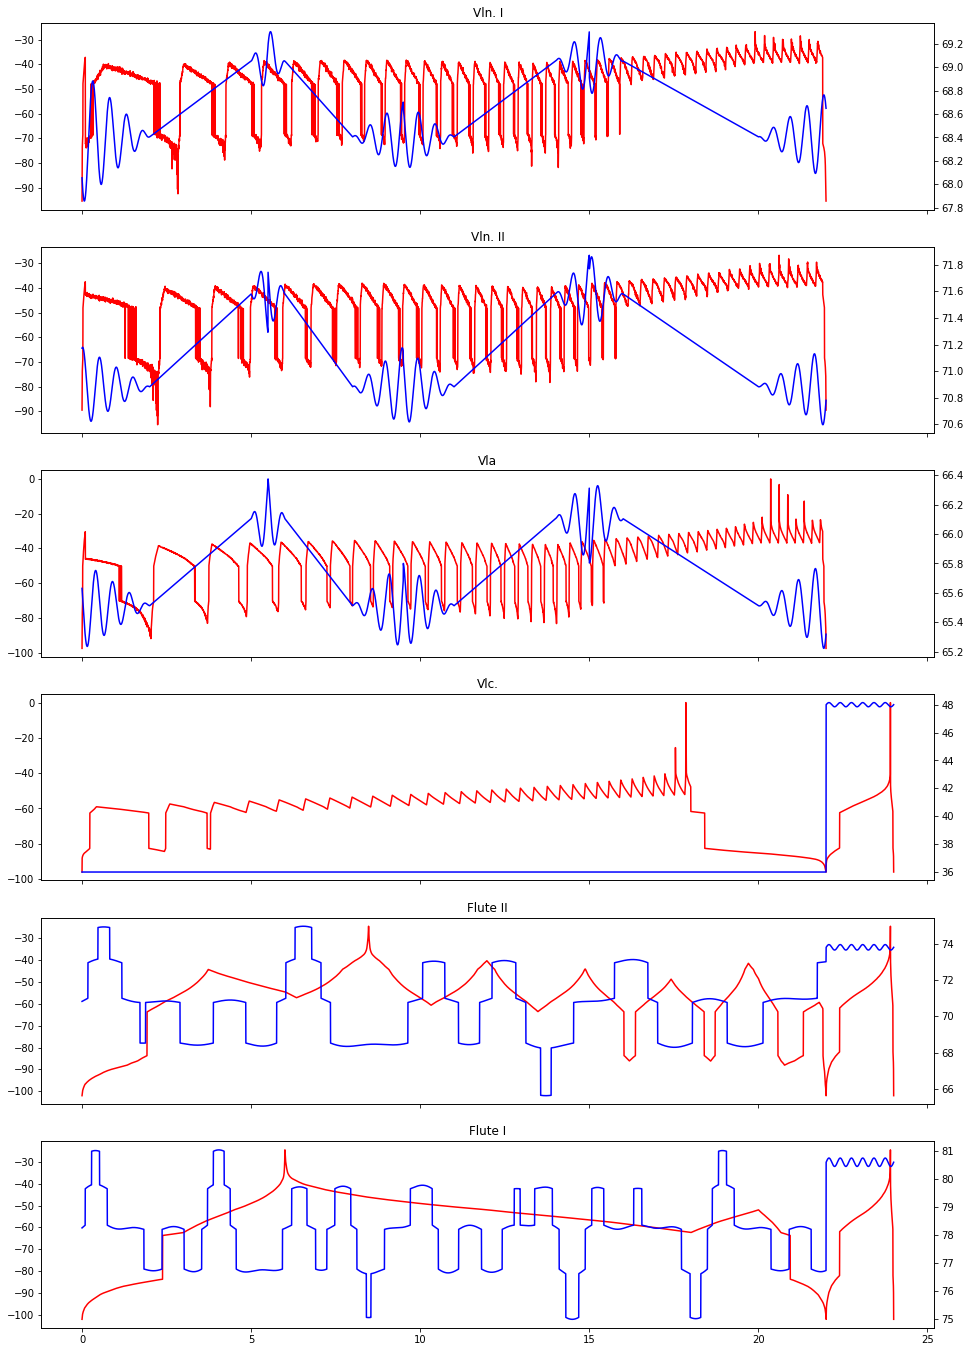

In [23]:
score.show()

In [24]:
score.play()

In [ ]:
score.parts[3].play()

In [ ]:
for part in score.parts:
    print(part.instrument) 

In [ ]:
cello = score.parts[3]
flute2 = score.parts[4]
flute1 = score.parts[5]

In [ ]:
cello.phrases[1].show()

In [ ]:
flute2.phrases[1].show()

In [ ]:
flute1.phrases[1].show()

In [ ]:
cello.phrases[1].pitch[:] = 61.

In [ ]:
score.show()

In [ ]:
def remap(xs, out_min, out_max):
    result = (xs - xs.min()) / xs.max()
    result = result * (out_max - out_min) + out_min
    
    return result

In [ ]:
with open('audio-data/original/22 Seconds V/score.pkl', 'rb') as f:
    score = pickle.load(f)

In [ ]:
score.parts[0].phrases[0].loudness = remap(score.parts[0].phrases[0].loudness, -70, -33)

In [ ]:
score.parts[1].phrases[0].loudness = remap(score.parts[1].phrases[0].loudness, -70, -33)

In [ ]:
score.parts[2].phrases[0].loudness = remap(score.parts[2].phrases[0].loudness, -70, -33)
score.parts[2].phrases[0].loudness += np.random.randn(len(score.parts[2].phrases[0].loudness))*0.5
score.parts[2].instrument = 'violin'

In [ ]:
score.parts[3].phrases[0].loudness = sweeping_triangle(22, 0.25, 4, 0.1, -43, -33) - 25
score.parts[3].phrases[0].loudness += sweeping_square(22, 0.125, 2, 0.5, -1, 0)
score.parts[3].phrases[0].loudness += line_segment(22, 0, 6)
score.parts[3].phrases[0].loudness += np.random.randn(len(score.parts[3].phrases[0].loudness))*0.5

score.parts[3].phrases[1].loudness = remap(score.parts[3].phrases[1].loudness, -69, -52)
score.parts[3].instrument = 'cello'

In [ ]:
score.parts[4].phrases[0].loudness = remap(score.parts[5].phrases[0].loudness, -63, 6-47)
score.parts[4].phrases[1].loudness = remap(score.parts[5].phrases[1].loudness, -60, -60)

In [ ]:
score.parts[4].play()